In [1]:
#!pip install -U scikit-learn
#!pip install numpy
#!pip install matplotlib

In [2]:
import pandas as pd
import boto3
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from boto3.dynamodb.conditions import Key, Attr
from botocore.exceptions import ClientError
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Recupera dados do DynamoDB

In [3]:
def query_dynamodb(bot):
    MY_ACCESS_KEY_ID = ''
    MY_SECRET_ACCESS_KEY = ''
    dynamodb = boto3.resource('dynamodb', aws_access_key_id=MY_ACCESS_KEY_ID, aws_secret_access_key=MY_SECRET_ACCESS_KEY, region_name='us-east-1')
    table = dynamodb.Table('wikibot-title_cleaned')
    
    df = pd.DataFrame()
    try:
        response = table.scan(
            FilterExpression = Attr('bot').eq(bot)
        )
    except ClientError as e:
        print(e.response['Error']['Message'])
    else:
        itemsList = []
        for i in response[u'Items']:
            itemsList += response['Items']
            df = pd.DataFrame(itemsList)
        
    return df

In [4]:
# Separa dataframes entre bots true e false
title_bot_true = query_dynamodb('True')
title_bot_false = query_dynamodb('True')

In [5]:
# Vec. transform com bots = true
str_list = title_bot_true["title_stemmed"].values
vec = TfidfVectorizer()
vec.fit(str_list)
features_bot_true = vec.transform(str_list)
print(features_bot_true)

  (0, 203)	0.5129374714724138
  (0, 95)	0.5129374714724138
  (0, 90)	0.4894437123197921
  (0, 13)	0.48397846355968566
  (1, 245)	1.0
  (2, 202)	0.5773502691896257
  (2, 151)	0.5773502691896257
  (2, 109)	0.5773502691896257
  (3, 203)	0.5129374714724138
  (3, 95)	0.5129374714724138
  (3, 90)	0.4894437123197921
  (3, 13)	0.48397846355968566
  (4, 119)	0.7071067811865475
  (4, 106)	0.7071067811865475
  (5, 205)	0.7071067811865475
  (5, 79)	0.7071067811865475
  (6, 203)	0.5129374714724138
  (6, 95)	0.5129374714724138
  (6, 90)	0.4894437123197921
  (6, 13)	0.48397846355968566
  (7, 203)	0.5129374714724138
  (7, 95)	0.5129374714724138
  (7, 90)	0.4894437123197921
  (7, 13)	0.48397846355968566
  (8, 222)	0.5773502691896257
  :	:
  (23707, 90)	0.4894437123197921
  (23707, 13)	0.48397846355968566
  (23708, 203)	0.5129374714724138
  (23708, 95)	0.5129374714724138
  (23708, 90)	0.4894437123197921
  (23708, 13)	0.48397846355968566
  (23709, 243)	0.7486321487033337
  (23709, 154)	0.6629856000908538

In [6]:
# Vec. transform com bots = false
str_list = title_bot_false["title_stemmed"].values
vec.fit(str_list)
features_bot_false = vec.transform(str_list)
print(features_bot_false)

  (0, 203)	0.5129374714724138
  (0, 95)	0.5129374714724138
  (0, 90)	0.4894437123197921
  (0, 13)	0.48397846355968566
  (1, 245)	1.0
  (2, 202)	0.5773502691896257
  (2, 151)	0.5773502691896257
  (2, 109)	0.5773502691896257
  (3, 203)	0.5129374714724138
  (3, 95)	0.5129374714724138
  (3, 90)	0.4894437123197921
  (3, 13)	0.48397846355968566
  (4, 119)	0.7071067811865475
  (4, 106)	0.7071067811865475
  (5, 205)	0.7071067811865475
  (5, 79)	0.7071067811865475
  (6, 203)	0.5129374714724138
  (6, 95)	0.5129374714724138
  (6, 90)	0.4894437123197921
  (6, 13)	0.48397846355968566
  (7, 203)	0.5129374714724138
  (7, 95)	0.5129374714724138
  (7, 90)	0.4894437123197921
  (7, 13)	0.48397846355968566
  (8, 222)	0.5773502691896257
  :	:
  (23707, 90)	0.4894437123197921
  (23707, 13)	0.48397846355968566
  (23708, 203)	0.5129374714724138
  (23708, 95)	0.5129374714724138
  (23708, 90)	0.4894437123197921
  (23708, 13)	0.48397846355968566
  (23709, 243)	0.7486321487033337
  (23709, 154)	0.6629856000908538

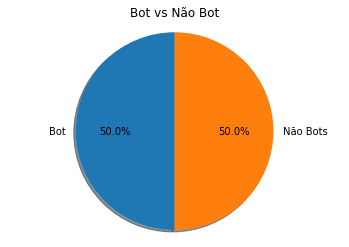

In [7]:
labels = 'Bot','Não Bots'
data = [features_bot_true.size, features_bot_false.size]

fig1, ax1 = plt.subplots()

ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')
ax1.set_title("Bot vs Não Bot")
plt.show()

## Palavras mais populares

          Frequency
Word               
covid-19       5082
dados          4928
pandemia       4928
metal           924
pagina          770
governo         616
futebol         616
casos           616
testes/1        616
yuri            462


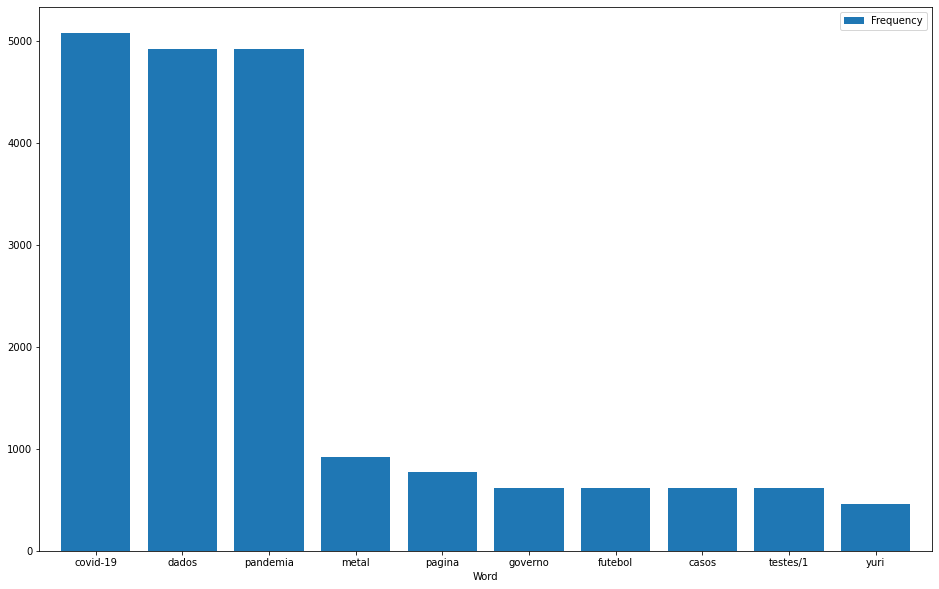

In [8]:
#bot = true
top_N = 10
words = title_bot_true["title_cleaned"].str.cat(sep=' ').split()
rslt = pd.DataFrame(Counter(words).most_common(top_N), columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

          Frequency
Word               
covid-19       5082
dados          4928
pandemia       4928
metal           924
pagina          770
governo         616
futebol         616
casos           616
testes/1        616
yuri            462


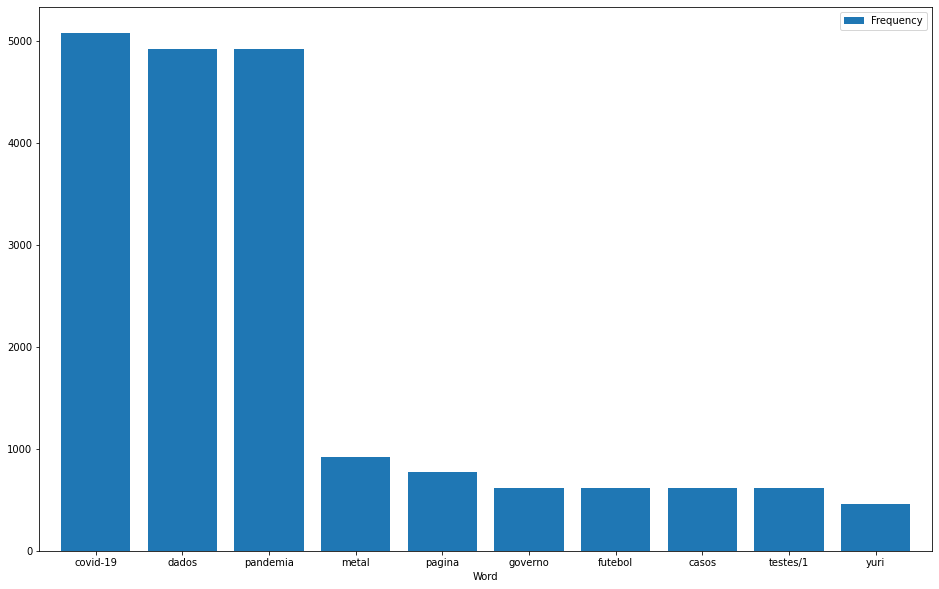

In [9]:
#bot = false
top_N = 10
words = title_bot_false["title_cleaned"].str.cat(sep=' ').split()
rslt = pd.DataFrame(Counter(words).most_common(top_N), columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

## K-Means bot = false

In [12]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_bot_false)
    Sum_of_squared_distances.append(km.inertia_)



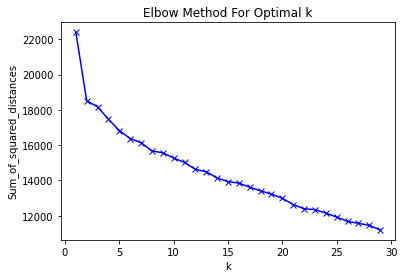

In [13]:
#Best result cluster = 150
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Uma forma de se julgar esses números, é analisar a técnica do cotovelo. Nela, procura-se o número de clusters que faz com que o ganho se torne marginal. Como nossa curva se aproxima de uma reta, não é possível visualmente escolher qualquer número de clusters (para o nossa caso, tratando de textos).

Dessa forma, considerando que processamentos de texto lidam com milhares de dimensões em uma mesma análise, já era esperado que os resultados sofressem dessa maldição.

Isso, porém, não significa que os clusters não sejam relevantes ou tenham qualquer prejuízo interpretativo. Na prática, a maldição da dimensionalidade implica apenas que é necessário input humano para decidir o melhor número de clusters.

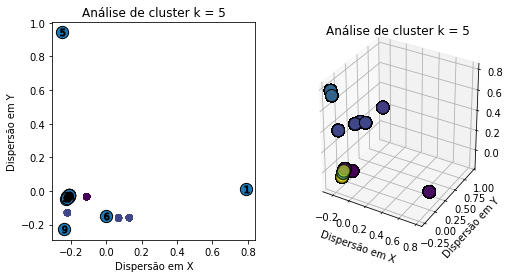

In [14]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1)

#Visualização gráfica 2D     # Converte as features para 2D     
pca = PCA(n_components=2, random_state= 0)
reduced_features = pca.fit_transform(features_bot_false.toarray())

# Converte os centros dos clusters para 2D     
reduced_cluster_centers = pca.transform(km.cluster_centers_)

#Plota gráfico 2D     
ax.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(features_bot_false))
ax.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='o', s=150, edgecolor='k')

#Plota números nos clusters     
for i, c in enumerate(reduced_cluster_centers):
    ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

cluster=5
#Adiciona informações no gráfico     
plt.title("Análise de cluster k = %d" % cluster)
plt.xlabel('Dispersão em X')
plt.ylabel('Dispersão em Y')



#Visualização gráfica 3D 

ax = fig.add_subplot(1, 2, 2,projection="3d")

# ax = plt.axes(projection="3d") 
# Adiciona informações no gráfico     
plt.title("Análise de cluster k = %d" % cluster)
plt.xlabel('Dispersão em X')
plt.ylabel('Dispersão em Y')

#converte dados para 3D     
pca = PCA(n_components=3, random_state=0)
reduced_features = pca.fit_transform(features_bot_false.toarray())

#Plota dados em 3D     
ax.scatter3D(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2], marker='o', s=150, edgecolor='k', c=km.predict(features_bot_false))

# Converte os centros dos clusters para 3D     
reduced_cluster_centers = pca.transform(km.cluster_centers_)

#Salva arquivo de imagem 3D     
plt.savefig("imagens/grafico_cluster_k=%d" % cluster)
plt.show()

## K-means bot = True

In [15]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_bot_true)
    Sum_of_squared_distances.append(km.inertia_)

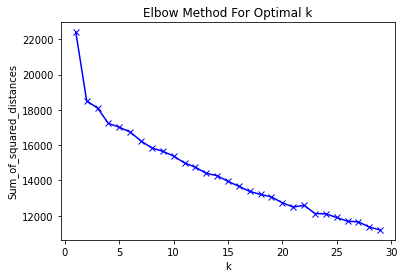

In [16]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

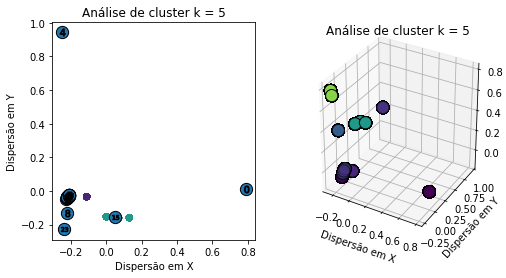

In [17]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1)

#Visualização gráfica 2D     # Converte as features para 2D     
pca = PCA(n_components=2, random_state= 0)
reduced_features = pca.fit_transform(features_bot_true.toarray())

# Converte os centros dos clusters para 2D     
reduced_cluster_centers = pca.transform(km.cluster_centers_)

#Plota gráfico 2D     
ax.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(features_bot_true))
ax.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='o', s=150, edgecolor='k')

#Plota números nos clusters     
for i, c in enumerate(reduced_cluster_centers):
    ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

cluster=5
#Adiciona informações no gráfico     
plt.title("Análise de cluster k = %d" % cluster)
plt.xlabel('Dispersão em X')
plt.ylabel('Dispersão em Y')



#Visualização gráfica 3D 

ax = fig.add_subplot(1, 2, 2,projection="3d")

# ax = plt.axes(projection="3d") 
# Adiciona informações no gráfico     
plt.title("Análise de cluster k = %d" % cluster)
plt.xlabel('Dispersão em X')
plt.ylabel('Dispersão em Y')

#converte dados para 3D     
pca = PCA(n_components=3, random_state=0)
reduced_features = pca.fit_transform(features_bot_true.toarray())

#Plota dados em 3D     
ax.scatter3D(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2], marker='o', s=150, edgecolor='k', c=km.predict(features_bot_true))

# Converte os centros dos clusters para 3D     
reduced_cluster_centers = pca.transform(km.cluster_centers_)

#Salva arquivo de imagem 3D     
plt.savefig("imagens/grafico_cluster_k=%d" % cluster)
plt.show()

## DBScan

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [ ]:
X_normalized = pd.DataFrame(features_bot_true)

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 